In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/wj/code/hospital_quality/test_file/outcome-of-care-measures.csv")

# How many hospitals in each State?

In [3]:
df.groupby('State')['Hospital Name'].count()

State
AK     17
AL     98
AR     77
AZ     77
CA    341
CO     72
CT     32
DC      8
DE      6
FL    180
GA    132
GU      1
HI     19
IA    109
ID     30
IL    179
IN    124
KS    118
KY     96
LA    114
MA     68
MD     45
ME     37
MI    134
MN    133
MO    108
MS     83
MT     54
NC    112
ND     36
NE     90
NH     26
NJ     65
NM     40
NV     28
NY    185
OH    170
OK    126
OR     59
PA    175
PR     51
RI     12
SC     63
SD     48
TN    116
TX    370
UT     42
VA     87
VI      2
VT     15
WA     88
WI    125
WV     54
WY     29
Name: Hospital Name, dtype: int64

# Finding the best hospital in a state based on "lowest 30-day mortality in one of heart attack”, “heart failure”, or “pneumonia”

In [25]:
mortality_cols = [
    "Hospital 30-Day Death (Mortality) Rates from Heart Failure",
    "Hospital 30-Day Death (Mortality) Rates from Pneumonia",
    "Hospital 30-Day Death (Mortality) Rates from Heart Attack"
]

best_hospital = df.groupby(["State","Hospital Name"])[mortality_cols].agg(min).reset_index() # reset index for a df. not aMultiIndex DataFrame.
# use .agg can take more action, such as .agg(['min', 'max', 'mean'])

/var/folders/1c/0j0c5fyn0z5_dfpm3qmssgjw0000gn/T/ipykernel_4895/2835186069.py:7: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  best_hospital = df.groupby(["State","Hospital Name"])[mortality_cols].agg(min).reset_index() # reset index for a df. not aMultiIndex DataFrame.


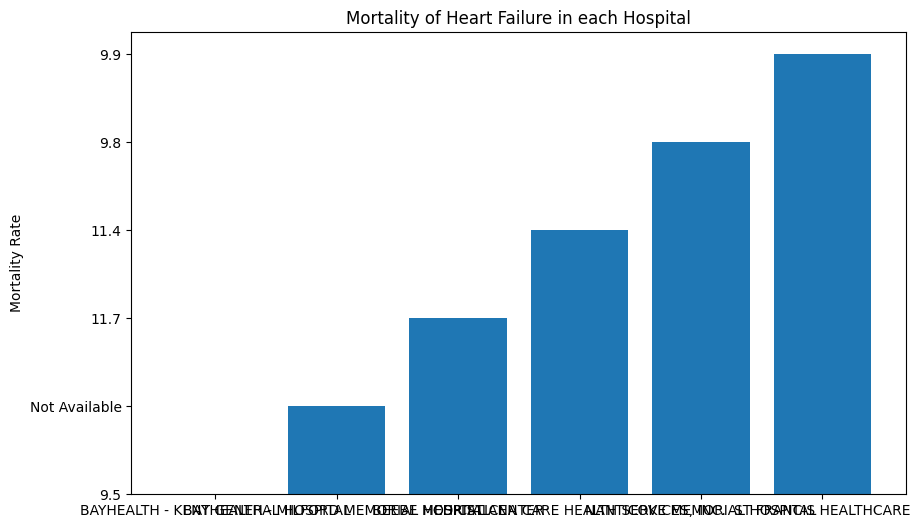

In [27]:
# Create the figure and axis
best_hospital = best_hospital[best_hospital['State'] == 'DE']

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size for better visibility

ax.bar(best_hospital["Hospital Name"],best_hospital["Hospital 30-Day Death (Mortality) Rates from Heart Failure"])
ax.set_ylabel('Mortality Rate')
ax.set_title('Mortality of Heart Failure in each Hospital')
plt.show()